# Importando as bibliotecas

In [81]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

# Criando a SparkSession

In [82]:
spark = SparkSession.builder.appName("ContadorDePalavrasReadmeJupyter").getOrCreate()

# Lendo o arquivo Parquet exportando no terminal e o transformando em um data frame novamente

In [83]:
palavras_df = spark.read.parquet("/home/jovyan/palavras_ordenadas_df.parquet")

# Ordenando o DataFrame do maior para o menor valor pela coluna "Quantidade"

In [84]:
palavras_ordenadas_df = df.orderBy(df["Quantidade"].desc())

# Exibindo o DataFrame ordenado

In [85]:
print(palavras_ordenadas_df)
palavras_ordenadas_df.show(palavras_ordenadas_df.count(), truncate=False)


DataFrame[Palavra: string, Quantidade: bigint]
+---------------+----------+
|Palavra        |Quantidade|
+---------------+----------+
|de             |30        |
|e              |24        |
|aws            |21        |
|a              |13        |
|builder        |12        |
|skill          |12        |
|para           |11        |
|do             |9         |
|sprint         |9         |
|o              |8         |
|dos            |8         |
|média          |7         |
|filmes         |7         |
|com            |7         |
|portuguese     |7         |
|curso          |6         |
|dados          |6         |
|da             |5         |
|uma            |5         |
|guerra         |5         |
|popularidade   |5         |
|em             |5         |
|gêneros        |5         |
|crime          |5         |
|amazon         |5         |
|entre          |4         |
|avaliação      |4         |
|3              |4         |
|getting        |4         |
|started        |4       

# Função para plotar gráfico na horizontal

In [86]:
def criar_grafico_horizontal(palavras):
    palavras_dicionario = dict(palavras)
    palavra, quantidade = zip(*sorted(zip(palavras_dicionario.values(), [str(i) for i in palavras_dicionario.keys()])))
    plt.barh(quantidade, palavra, color='#33ccff')
    plt.xlabel('Quantidade')
    plt.ylabel('Palavras')
    plt.title('Top palavras do meu README com quantidade acima de 4')
    plt.show()


# Convertendo o DataFrame para RDD e filtrando apenas a quantidade de palavras maiores que 4

In [87]:
palavras_ordenadas_rdd = palavras_ordenadas_df.rdd
palavras_ordenadas_rdd = palavras_ordenadas_rdd.filter(lambda quantidade: quantidade[1] > 4 )

# Mapeando as linhas do RDD para tuplas (Palavra, Quantidade), coleta o rdd como uma lista e chama a função para criar gráfico com a lista na horizontal

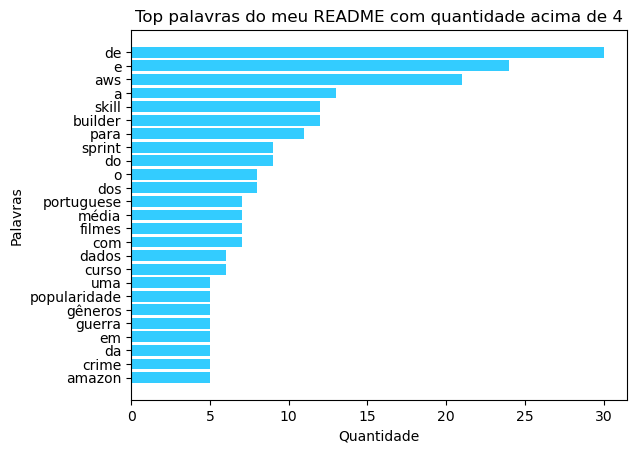

In [80]:
palavras_ordenadas_mapeamento_rdd = palavras_ordenadas_rdd.map(lambda linha: (linha["Palavra"], linha["Quantidade"]))

lista_palavras = palavras_ordenadas_mapeamento_rdd.collect()

criar_grafico_horizontal(lista_palavras)
